<Figure size 3000x2000 with 0 Axes>

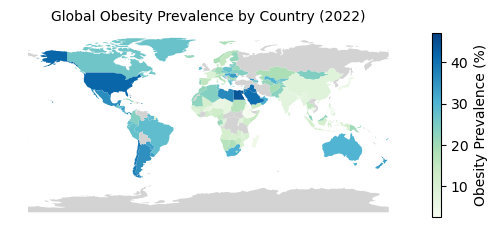

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


bmi_data = pd.read_csv(r"C:\Users\bgane\Desktop\TOPICS DATA\obese bmi data.csv")

# Loading world shapefile 
world = gpd.read_file(r"C:\Users\bgane\Desktop\TOPICS DATA\ne_110m_admin_0_countries.shp")

# Prepareing the data for 2022
bmi_2022_country = bmi_data[bmi_data['Period'] == 2022][['Location', 'FactValueNumeric']]
bmi_2022_country = bmi_2022_country.groupby('Location').mean().reset_index()

# Mergeing the BMI data with the world geometries
map_data = world.merge(bmi_2022_country, left_on='NAME', right_on='Location', how='left')

# Plot the heatmap
plt.figure(figsize=(30, 20))
map_data.plot(column='FactValueNumeric', cmap='GnBu', legend=True, 
              legend_kwds={'label': "Obesity Prevalence (%)",'shrink':.5},
              missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title('Global Obesity Prevalence by Country (2022)', fontsize=10)
plt.axis('off')
plt.show()
